## Save Check Points of Model

Define a variable and set it to not trainable. Assign it to be used to book keep the progress of the model
- We need to pass global_step as a parameter to the optimizer so it knows to increment global_step by one with each training step

By default, saver.save() stores all variables of the graph, and this is recommended. However, you can also choose what
 variables to store by passing them in as a list or a dict when we create the saver object.

In [ ]:
self.global_step = tf.Variable(0, dtype=tf.int32, trainable=False, name='global_step')
self.optimizer = tf.train.GradientDescentOptimizer(self.lr).minimize(self.loss,
global_step=self.global_step)
saver = tf.train.Saver() # defaults to saving all variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    average_loss = 0.0
    writer = tf.summary.FileWriter('./improved_graph', sess.graph)
    for index in xrange(num_train_steps):
        batch = batch_gen.next()
        loss_batch, _ = sess.run([model.loss, model.optimizer],
        feed_dict={model.center_words: batch[0],
        model.target_words: batch[1]})
        average_loss += loss_batch
        if (index + 1) % 1000 == 0:
        saver.save(sess, 'checkpoints/skip-gram', global_step=model.global_step)


It will create a directory filled like this:
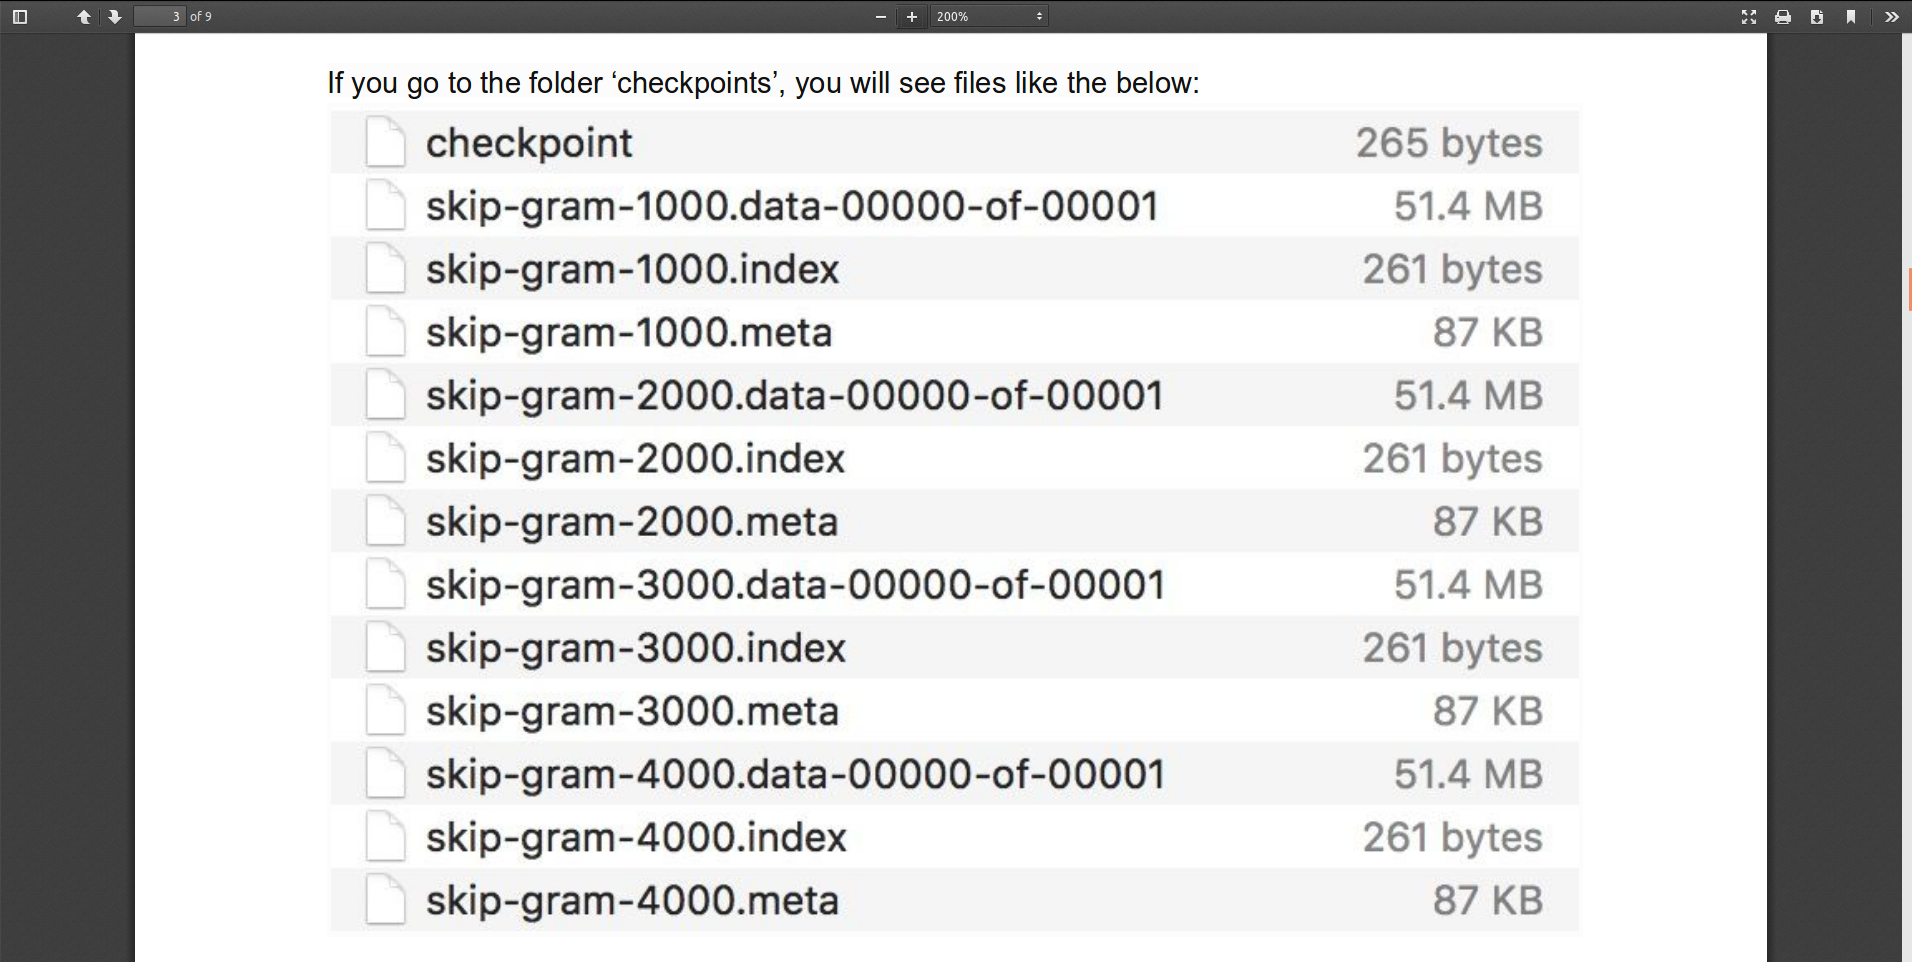